In [195]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

#options for display
%matplotlib inline
pd.set_option('display.max_columns', 120)

#### Import Data

In [196]:
train_x = pd.read_csv('../Data/train_x2.csv')
print('dimensions of df: ' + str(train_x.shape))
train_x.head()

dimensions of df: (1458, 181)


,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,bsmt_height,exterior_quality,exterior_condition,bsmt_condition,bsmt_exposure,bsmt_finished1,bsmt_finished2,BsmtFinishedShare,heating_quality,kitchen_quality,home_funct,fireplace_quality,fireplace_ttlscore,gar_qual,gar_cond,gar_perception,driveway,fence,full_baths,half_baths,average_quality,room_size,age,...,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.740604,-0.110028,-0.166392,0.064282,0.236697,0.743072,-0.232192,0.691978,-0.456504,0.879395,1.160622,0.798379,-0.351496,-0.562652,-0.089539,0.264006,-0.813511,1.196039,-0.132704,0.522024,0.812074,1.257355,0.242788,-0.208707,0.952730,1.034050,0.378415,-0.934649,0.796281,-0.40184,-0.127988,-0.291975,-0.06425,0.056379,-0.187506,-0.524884,0.330803,0.601740,1.098272,-0.199986,0.148733,-0.657132,1.198398,-0.13858,1.041111,0.853765,0.783021,0.213381,-1.019613,-0.994280,0.148993,0.115219,0.149438,0.274667,-0.44094,1.303969,1.091746,0.955678,-0.323237,-1.036593,...,-0.216014,0.527092,-0.087189,-0.491841,-0.069457,-0.037062,-0.026198,-0.037062,-0.188445,-0.026198,-0.207168,-0.423806,-0.026198,-0.421552,-0.282843,-0.037062,-0.129369,1.353170,-0.405631,-0.134746,-0.045408,-0.069457,-0.132083,-0.026198,-0.205361,-0.406777,-0.083103,-0.414760,-0.026198,-0.328486,-0.058661,-0.132083,1.375811,-0.395253,-0.163587,1.508776,-1.206045,-0.307562,-0.877164,1.122704,-0.129369,-0.064282,-0.045408,-0.137361,-0.045408,-0.026198,0.307562,-0.05245,-0.037062,-0.078811,-0.058661,-0.058661,-0.299476,-0.045408,0.388265,-0.05245,-0.091098,-0.117933,0.465863,-0.303537
1,-0.318637,0.538424,0.080360,0.064282,0.236697,0.743072,-0.232192,0.016067,1.937385,-0.423536,-0.798451,0.972264,-0.351496,-0.145044,0.420160,0.264006,0.408288,-0.865578,-0.132704,-0.401446,0.812074,-0.767457,0.242788,-0.208707,-0.239095,-0.002395,0.200240,1.328804,-1.046452,-0.40184,-0.127988,-0.291975,-0.06425,0.056379,-0.187506,0.309946,-0.413842,0.601740,-0.671723,-0.199986,0.148733,2.024179,0.626824,-0.13858,0.931520,0.853765,-0.714848,0.213381,0.718573,0.578540,0.148993,0.115219,0.149438,0.274667,-0.44094,0.120845,1.091746,0.241762,-0.408187,0.245464,...,-0.216014,0.527092,-0.087189,-0.491841,-0.069457,-0.037062,-0.026198,-0.037062,-0.188445,-0.026198,-0.207168,-0.423806,-0.026198,2.372187,-0.282843,-0.037062,-0.129369,-0.739006,-0.405631,-0.134746,-0.045408,-0.069457,-0.132083,-0.026198,-0.205361,-0.406777,-0.083103,2.411034,-0.026198,-0.328486,-0.058661,-0.132083,-0.726844,-0.395253,-0.163587,-0.662789,0.829156,-0.307562,1.140037,-0.890706,-0.129369,-0.064282,-0.045408,-0.137361,-0.045408,-0.026198,0.307562,-0.05245,-0.037062,-0.078811,-0.

In [197]:
train_y = pd.read_csv('../Data/train_y2.csv', header = None)
print('dimensions of df: ' + str(train_y.shape))
train_y = train_y.values.ravel()

dimensions of df: (1458, 1)


In [198]:
test_x = pd.read_csv('../Data/test_x2.csv')
print('dimensions of df: ' + str(test_x.shape))
test_x.head()

dimensions of df: (1459, 181)


,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,bsmt_height,exterior_quality,exterior_condition,bsmt_condition,bsmt_exposure,bsmt_finished1,bsmt_finished2,BsmtFinishedShare,heating_quality,kitchen_quality,home_funct,fireplace_quality,fireplace_ttlscore,gar_qual,gar_cond,gar_perception,driveway,fence,full_baths,half_baths,average_quality,room_size,age,...,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.318637,0.538424,0.458944,0.064282,0.236697,0.743072,-0.232192,-0.747564,0.452141,-1.153935,-0.798451,0.590885,2.117385,-0.179631,-0.051303,0.264006,-0.673451,-0.865578,-0.132704,-1.393145,-1.011550,-0.767457,-1.016229,-0.208707,-0.948212,-0.583407,0.680712,0.908882,-1.046452,-0.40184,-0.127988,2.996047,-0.06425,0.056379,-0.187506,0.528541,1.335773,-0.495744,-0.671723,-0.199986,0.148733,-0.657132,-0.082388,-0.13858,0.747385,-1.141840,-0.714848,0.213381,-1.019613,-0.994280,0.148993,0.115219,0.149438,0.274667,1.042067,-1.462322,-0.821977,-1.424177,-3.569525,0.645201,...,-0.216014,0.527092,-0.087189,-0.491841,-0.069457,-0.037062,-0.026198,-0.037062,-0.188445,-0.026198,-0.207168,-0.423806,-0.026198,-0.421552,-0.282843,-0.037062,-0.129369,1.353170,-0.405631,-0.134746,-0.045408,-0.069457,-0.132083,-0.026198,-0.205361,-0.406777,-0.083103,-0.41476,-0.026198,-0.328486,-0.058661,-0.132083,1.375811,-0.395253,-0.163587,-0.662789,0.829156,-0.307562,1.140037,-0.890706,-0.129369,-0.064282,-0.045408,-0.137361,-0.045408,-0.026198,0.307562,-0.05245,-0.037062,-0.078811,-0.058661,-0.058661,-0.299476,-0.045408,0.388265,-0.05245,-0.091098,-0.117933,0.465863,-0.303537
1,-0.318637,0.577912,0.877341,0.064282,0.236697,-1.395543,-0.232192,0.016067,0.452141,-1.300584,0.856524,0.940753,-0.351496,0.107235,0.490362,0.264006,0.576571,-0.865578,-0.132704,-0.247171,-1.011550,1.257355,0.242788,-0.208707,-0.239095,-0.700062,-0.178403,1.495210,0.498802,-0.40184,-0.127988,-0.291975,-0.06425,0.056379,9.470356,0.528541,1.335773,-0.495744,-0.671723,-0.199986,0.148733,-0.657132,0.626824,-0.13858,0.748844,-1.141840,0.783021,0.213381,-1.019613,-0.994280,0.148993,0.115219,0.149438,0.274667,-0.440940,-1.462322,1.091746,-0.256959,-0.134723,0.699396,...,-0.216014,-1.897200,-0.087189,2.033176,-0.069457,-0.037062,-0.026198,-0.037062,-0.188445,-0.026198,-0.207168,-0.423806,-0.026198,-0.421552,-0.282843,-0.037062,-0.129369,-0.739006,2.465293,-0.134746,-0.045408,-0.069457,-0.132083,-0.026198,-0.205361,-0.406777,-0.083103,-0.41476,-0.026198,-0.328486,-0.058661,-0.132083,-0.726844,2.530023,-0.163587,1.508776,-1.206045,-0.307562,1.140037,-0.890706,-0.129369,-0.064282,-0.045408,-0.137361,-0.045408,-0.026198,0.307562,-0.05245,-0.037062

### Import sklearn libraries

In [225]:
from sklearn.linear_model import ElasticNet, Lasso, LassoCV, Ridge, BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

#### Cross Validation Function

In [200]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_x.values)
    rmse= np.sqrt(-cross_val_score(model, train_x.values, train_y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [201]:
def kaggle(x):
    # Input x - the model prediction
    # returns dataframe of sales price and Id ready to be written to
    # csv for kaggle competition submission.
    return(pd.DataFrame({'Id': (np.arange(len(test_x)) + 1461),
                         'SalePrice': np.exp(x)}))

## Regressions

#### Lasso (L1 regularizer)

In [202]:
lasso = make_pipeline(Lasso(alpha =0.003, random_state=1))

In [203]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1175 (0.0032)



In [204]:
lasso.fit(train_x, train_y)

Pipeline(steps=[('lasso', Lasso(alpha=0.003, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [205]:
kaggle(lasso.predict(test_x).ravel()).to_csv("Lasso_alpha0p0005_alldata.csv", index = False)

##### Other model stats

In [206]:
model_lasso = LassoCV(alphas = [.0001,0.003,0.0028, 0.0032,0.0033, 0.0029]).fit(train_x.values, train_y) #original: [1, 0.1, .01, 0.001, 0.0005]

In [207]:
coef = pd.Series(model_lasso.coef_, index = train_x.columns)

In [208]:
model_lasso.alpha_

0.0030000000000000001

In [209]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 91 variables and eliminated the other 90 variables


In [210]:
imp_coef = pd.concat([coef.sort_values().head(25),
                     coef.sort_values().tail(25)])

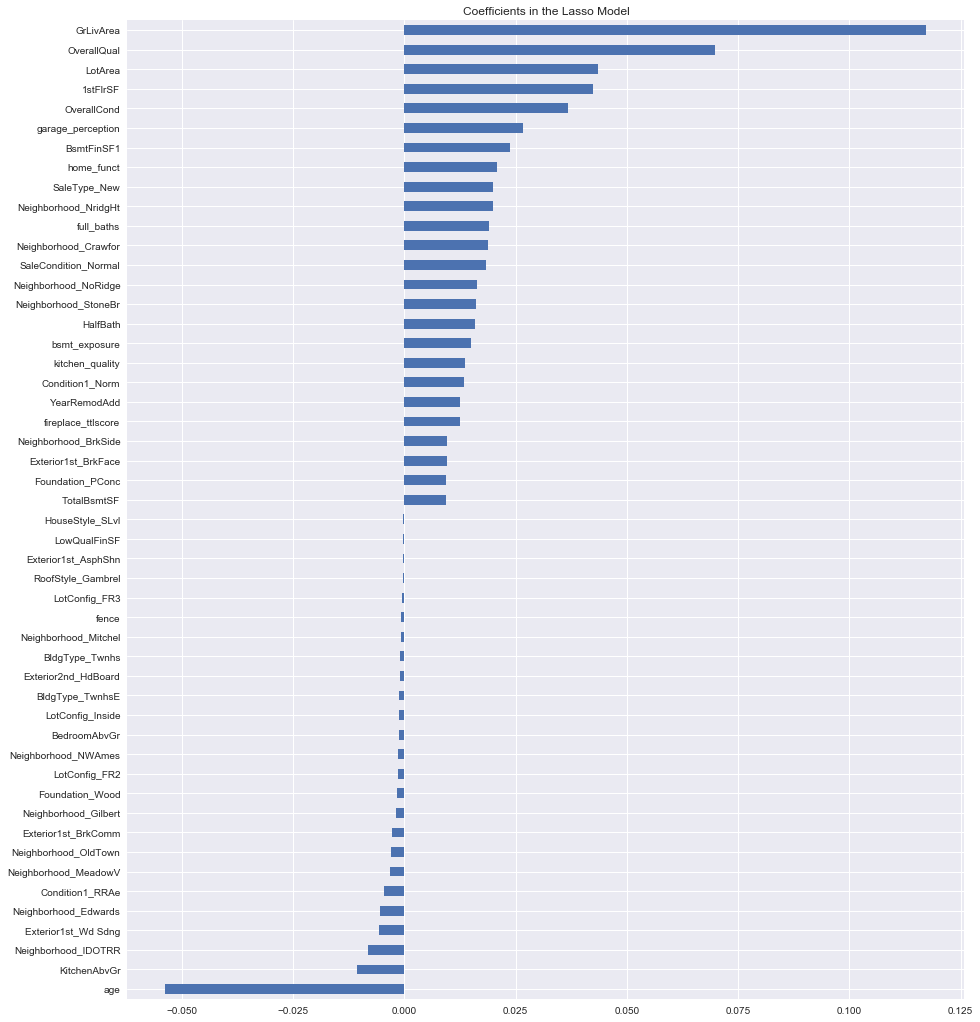

In [211]:
imp_coef.plot(kind = "barh", figsize = (15,18))
plt.title("Coefficients in the Lasso Model")

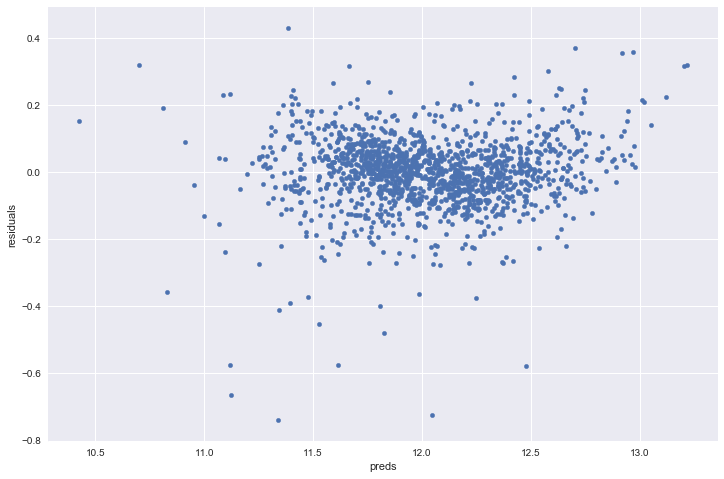

In [212]:
#let's look at the residuals as well:

preds = pd.DataFrame({"preds":model_lasso.predict(train_x.values), "true": train_y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter", figsize = (12,8))

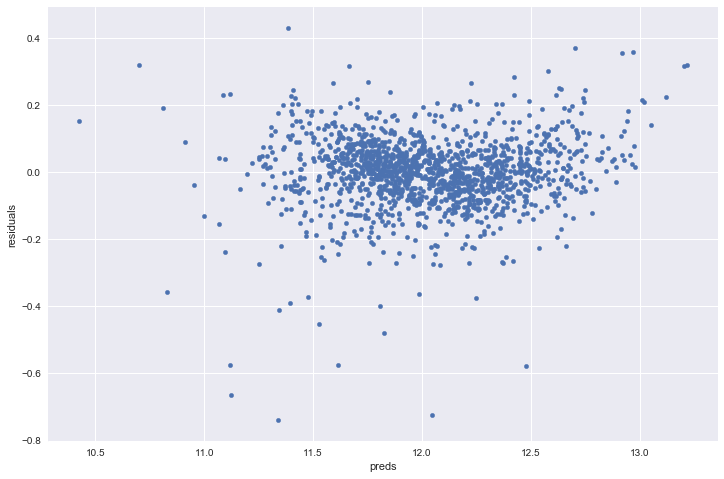

In [213]:
preds.plot(x = "preds", y = "residuals",kind = "scatter", figsize = (12,8))

#### Ridge (L2 regularizer)

In [214]:
ridge = make_pipeline(Ridge(alpha =0.001, random_state=1))

In [215]:
score = rmsle_cv(ridge)
print("\nRidge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Ridge score: 0.1249 (0.0064)



#### Elastic Net Regression (part Ridge, part Lasso)

In [275]:
ENet = make_pipeline(ElasticNet(alpha=0.001, l1_ratio=.9, random_state=3))

In [276]:
score = rmsle_cv(ENet)
print("\nENet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


ENet score: 0.1186 (0.0036)



#### Kernel Ridge regression. Not sure what this is yet - polynomial kernel?

Grid Search

In [222]:
KRR = KernelRidge()

In [261]:
grid_para_krr = [
    {
        'alpha': [0.00001, 0.001, 0.01, 0.1,1,5],
        'kernel': ['rbf', 'laplacian'],
        'gamma': [0.00001, 0.001, 0.01, 0.1,1,5]
    },
    {
        'alpha': [0.00001, 0.001, 0.01, 0.1,1,5,10],
        'kernel': ['polynomial'],
        'degree': [1, 2,3],
        'coef0': [1, 2.5,5]
    }
]

In [262]:
grid_search_krr = GridSearchCV(KRR, grid_para_krr, scoring = 'neg_mean_squared_error', cv = 3, n_jobs = -1)
grid_search_krr.fit(train_x, train_y)

GridSearchCV(cv=3, error_score='raise',
       estimator=KernelRidge(alpha=20, coef0=5, degree=3, gamma=None, kernel='polynomial',
      kernel_params=None),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'alpha': [1e-05, 0.001, 0.01, 0.1, 1, 5], 'kernel': ['rbf', 'laplacian'], 'gamma': [1e-05, 0.001, 0.01, 0.1, 1, 5]}, {'alpha': [1e-05, 0.001, 0.01, 0.1, 1, 5, 10], 'kernel': ['polynomial'], 'degree': [1, 2, 3], 'coef0': [1, 2.5, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [264]:
grid_search_krr.best_params_

{'alpha': 1, 'coef0': 2.5, 'degree': 2, 'kernel': 'polynomial'}

In [234]:
grid_para_krr2 = [
    {
        'alpha': [0.5,1,1.5,10],
        'kernel': ['polynomial'],
        'degree': [2,3],
        'coef0': [2, 2.5,3,4]
    }
]

In [235]:
grid_search_krr2 = GridSearchCV(KRR, grid_para_krr2, scoring = 'neg_mean_squared_error', cv = 3, n_jobs = -1)
grid_search_krr2.fit(train_x, train_y)

GridSearchCV(cv=3, error_score='raise',
       estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'alpha': [0.5, 1, 1.5, 10], 'kernel': ['polynomial'], 'degree': [2, 3], 'coef0': [2, 2.5, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [236]:
grid_search_krr2.best_params_

{'alpha': 10, 'coef0': 4, 'degree': 3, 'kernel': 'polynomial'}

In [253]:
grid_para_krr3 = [
    {
        'alpha': [10 ,15,20,25,30],
        'kernel': ['polynomial'],
        'degree': [2,3,4],
        'coef0': [4,5,6,8,10]
    }
]

In [254]:
grid_search_krr3 = GridSearchCV(KRR, grid_para_krr3, scoring = 'neg_mean_squared_error', cv = 5, n_jobs = -1)
grid_search_krr3.fit(train_x, train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KernelRidge(alpha=20, coef0=5, degree=3, gamma=None, kernel='polynomial',
      kernel_params=None),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'alpha': [10, 15, 20, 25, 30], 'kernel': ['polynomial'], 'degree': [2, 3, 4], 'coef0': [4, 5, 6, 8, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [255]:
grid_search_krr3.best_params_

{'alpha': 20, 'coef0': 5, 'degree': 3, 'kernel': 'polynomial'}

In [256]:
KRR = KernelRidge(alpha = 20, coef0 = 5, degree = 3, kernel = 'polynomial')   #prior version: (alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [257]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1163 (0.0031)



In [247]:
KRR.fit(train_x, train_y)

KernelRidge(alpha=20, coef0=5, degree=3, gamma=None, kernel='polynomial',
      kernel_params=None)

In [248]:
kaggle(KRR.predict(test_x).ravel()).to_csv("KRR_20_coef5_deg3_kernpoly.csv", index = False)

#### Gradient Boosting Regression

In [102]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [103]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

C:\Users\dsp21\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dsp21\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dsp21\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dsp21\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

Gradient Boosting score: 0.1164 (0.0084)



In [104]:
model_gbr = GBoost.fit(train_x.values, train_y) # NO cv so bad - just for feature importance, though is that ok?

C:\Users\dsp21\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [105]:
gbr_importances = pd.Series(model_gbr.feature_importances_, index = train_x.columns)
gbr_importances.sort_values(ascending = False).head(20)

LotArea              0.048969
LotFrontage          0.044210
room_size            0.043578
GrLivArea            0.042619
1stFlrSF             0.042247
GarageArea           0.038755
TotalBsmtSF          0.036137
GarageYrBlt          0.033645
BsmtUnfSF            0.033610
average_quality      0.033049
BsmtFinSF1           0.030609
age                  0.029184
OpenPorchSF          0.025217
MoSold               0.024863
BsmtFinishedShare    0.024186
YearRemodAdd         0.023396
WoodDeckSF           0.023075
MasVnrArea           0.022912
2ndFlrSF             0.022198
garage_perception    0.018747
dtype: float64

##### The GBR loves those residuals!!

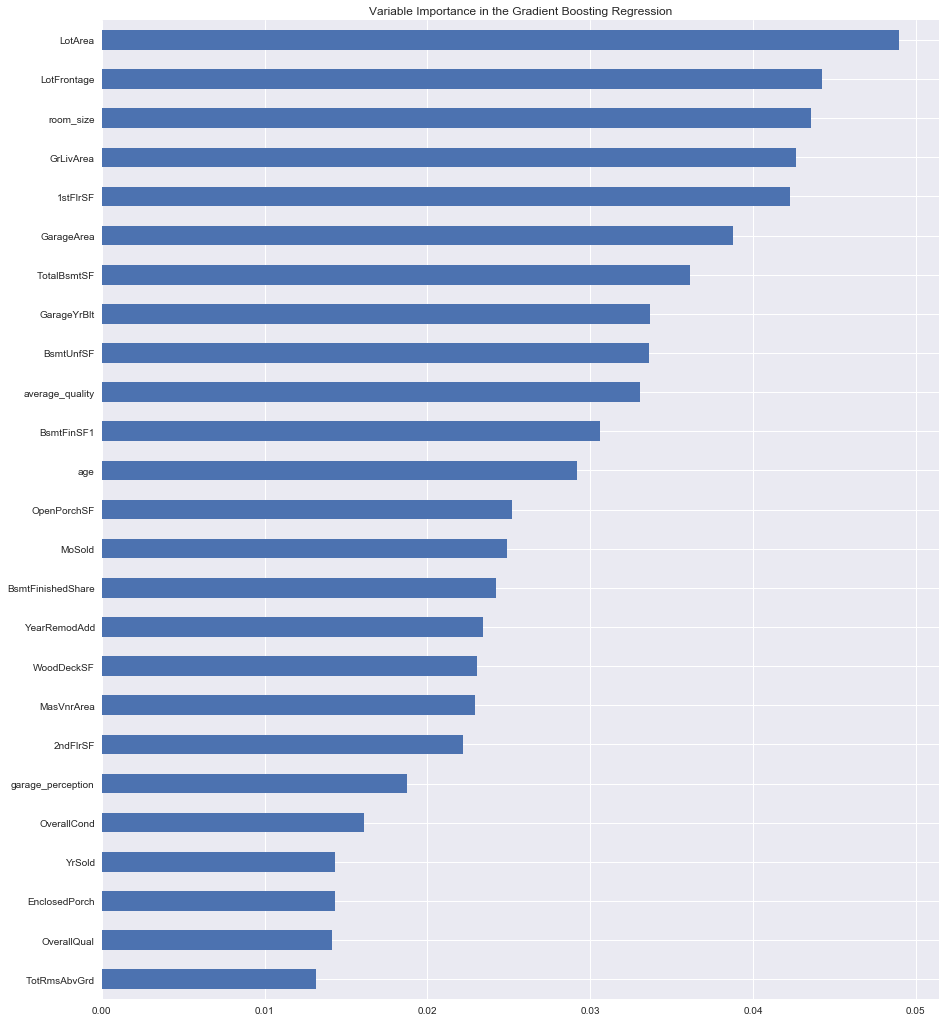

In [106]:
gbr_importances.sort_values(ascending= False).head(25).sort_values().plot(kind= "barh", figsize=(15,18))
plt.title("Variable Importance in the Gradient Boosting Regression")

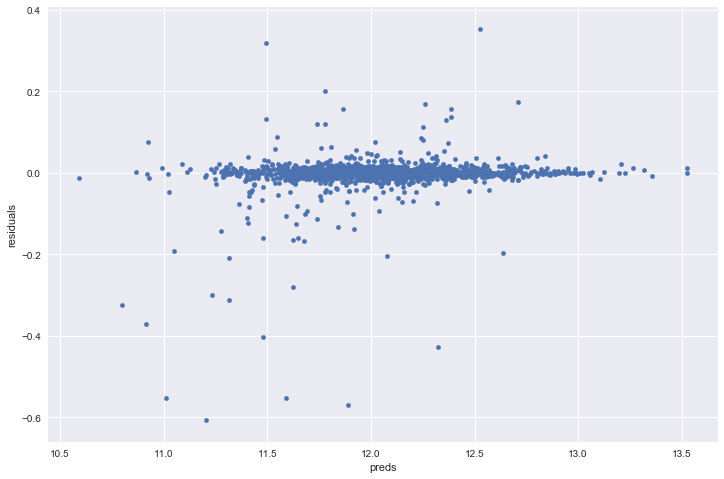

In [107]:
#let's look at the residuals as well:

preds = pd.DataFrame({"preds":model_gbr.predict(train_x.values), "true": train_y.values.ravel()})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter", figsize = (12,8))
#hmmm... i think his is bc of the overfitting?

##### Further linear regression needed. Including feature engineering and implement some of these: 
https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset